In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score

# 1. Carregar dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

display(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# 2. Métricas
metricas = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro')
}

In [15]:
# 3. Pipeline
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

# 4. Validação cruzada com todas as métricas
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=metricas)

# 5. Imprimir apenas médias
print("=== Média das Métricas CV ===")
for nome in metricas:
    media = np.mean(cv_results[f'test_{nome}'])
    print(f"{nome:<15}: {media:.4f}")

=== Média das Métricas CV ===
accuracy       : 0.9533
f1_macro       : 0.9532
recall_macro   : 0.9533
precision_macro: 0.9550


In [16]:
# 6. Treinar para visualizar a árvore
pipeline.fit(X, y)
clf_trained = pipeline.named_steps['classifier']

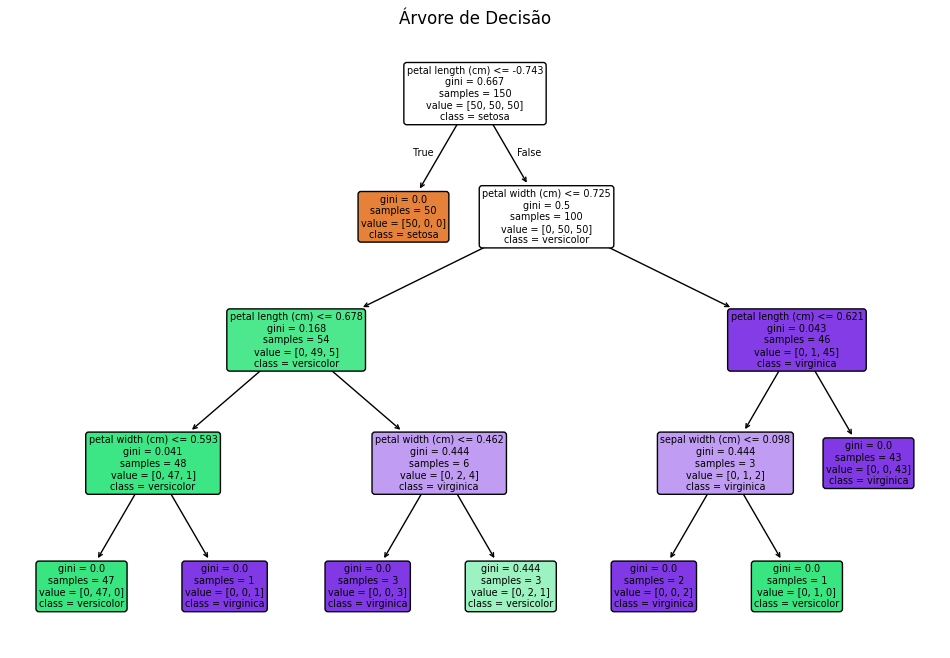

In [17]:
# 7. Plotar árvore
plt.figure(figsize=(12, 8))
plot_tree(clf_trained,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão")
plt.show()